In [ ]:
from google.colab import drive
drive.mount("/content/drive")

!ls /content/drive/MyDrive/Colab\ Notebooks/advertising.csv
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'/content/drive/MyDrive/Colab Notebooks/advertising.csv'
/content


Loading the dataset

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/advertising.csv')

Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


EDA

In [ ]:
#correlation matrix
correlation_data = data[ : ]
correlation_matrix = correlation_data.corr()
correlation_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


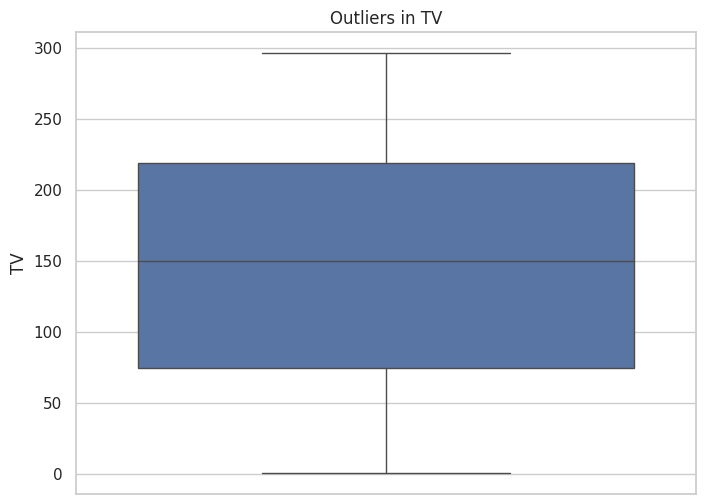

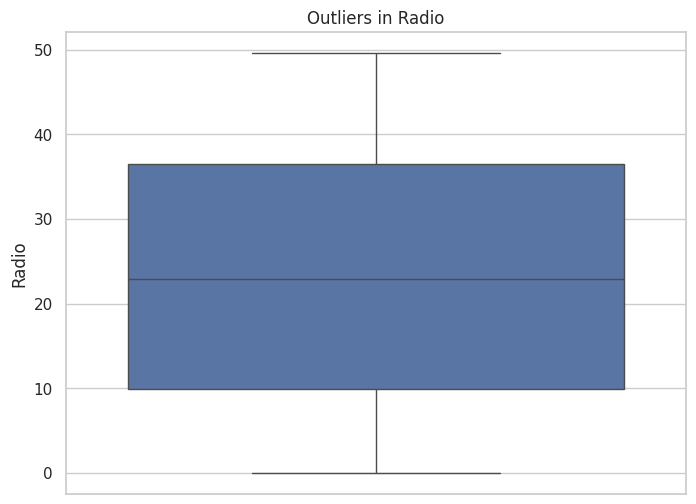

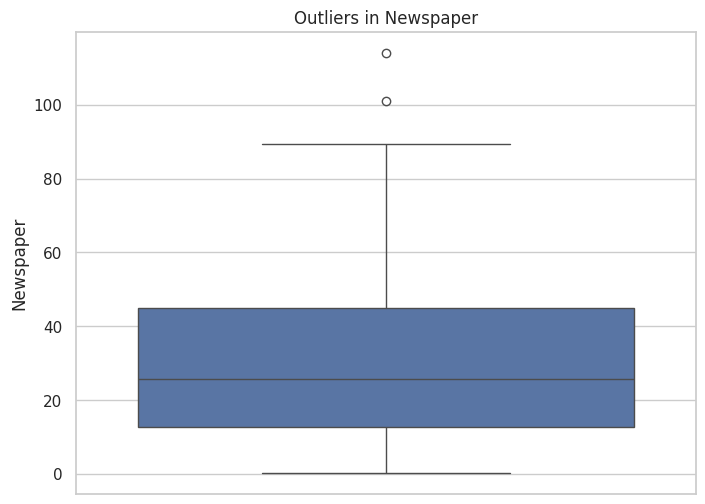

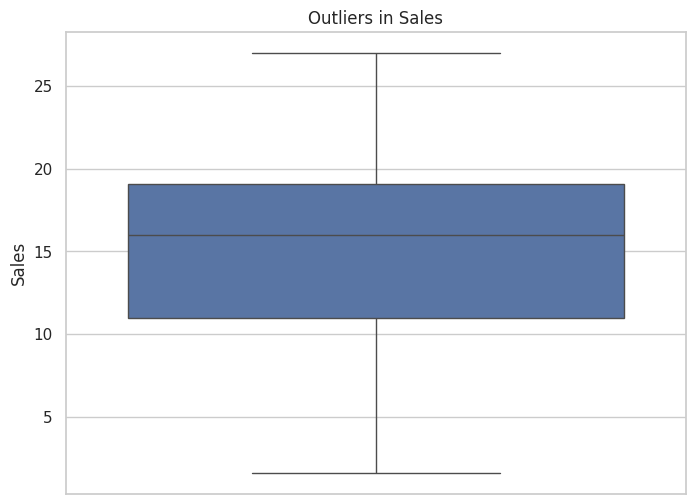

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
columns = ['TV', 'Radio', 'Newspaper', 'Sales']
for i in columns:
    if pd.api.types.is_numeric_dtype(data[i]):
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=data[i])
        plt.title(f'Outliers in {i}')
        plt.show()

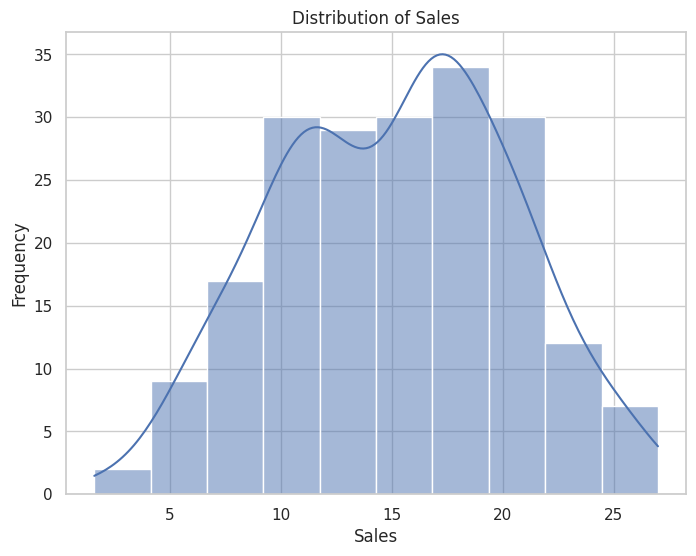

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Sales'].dropna(), kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

Modelling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_standardized = scaler.fit_transform(data)

df= pd.DataFrame(df_standardized, columns=data.columns)

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

X = data.drop(columns=['Sales'])
y = data['Sales']

results = {
    'Regression Tree': {'Test MSE': [], 'Test RMSE': [], 'Test RSE': [], 'Test RSS': [], 'Test R^2': []},
    'Ridge Regression': {'Test MSE': [], 'Test RMSE': [], 'Test RSE': [], 'Test RSS': [], 'Test R^2': []},
    'Lasso Regression': {'Test MSE': [], 'Test RMSE': [], 'Test RSE': [], 'Test RSS': [], 'Test R^2': []},
    'Principal Component Regression (PCR)': {'Test MSE': [], 'Test RMSE': [], 'Test RSE': [], 'Test RSS': [], 'Test R^2': []},
    'Regression Splines': {'Test MSE': [], 'Test RMSE': [], 'Test RSE': [], 'Test RSS': [], 'Test R^2': []},
    'Support Vector Regression': {'Test MSE': [], 'Test RMSE': [], 'Test RSE': [], 'Test RSS': [], 'Test R^2': []}
}

num_features = X.shape[1]

# Perform 20 iterations
for _ in range(20):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    models = {
        'Regression Tree': DecisionTreeRegressor(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Principal Component Regression (PCR)': make_pipeline(StandardScaler(), PCA(n_components=num_features), LinearRegression()),
        'Regression Splines': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
        'Support Vector Regression': SVR()
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        #metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        rss = np.sum((y_test - y_pred) ** 2)
        rse = np.sqrt(rss / (len(y_test) - X_test.shape[1] - 1))
        r2 = r2_score(y_test, y_pred)

        #results
        results[model_name]['Test MSE'].append(mse)
        results[model_name]['Test RMSE'].append(rmse)
        results[model_name]['Test RSE'].append(rse)
        results[model_name]['Test RSS'].append(rss)
        results[model_name]['Test R^2'].append(r2)

#average performance for each model
average_results = {model: {metric: np.mean(scores) for metric, scores in metrics.items()} for model, metrics in results.items()}
results_df = pd.DataFrame(average_results)

#display the results
print("Model Comparison Results:")
print(results_df)

Model Comparison Results:
           Regression Tree  Ridge Regression  Lasso Regression  \
Test MSE          2.606758          2.766435          2.766112   
Test RMSE         1.598721          1.656060          1.656601   
Test RSE          1.654834          1.714185          1.714745   
Test RSS        156.405500        165.986092        165.966733   
Test R^2          0.904090          0.899048          0.899095   

           Principal Component Regression (PCR)  Regression Splines  \
Test MSE                               2.766429            2.304425   
Test RMSE                              1.656058            1.500859   
Test RSE                               1.714183            1.553537   
Test RSS                             165.985746          138.265529   
Test R^2                               0.899049            0.915747   

           Support Vector Regression  
Test MSE                    4.043080  
Test RMSE                   2.003913  
Test RSE                    2.074

Cross-Validation and Hyper-parameter Tuning

Running GridSearchCV for Ridge Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Ridge Regression - Best Parameters: {'ridge__alpha': 100}
Ridge Regression - Metrics: {'MSE': 33.62228565978933, 'RMSE': 5.798472700616028, 'RSE': 6.001989461222955, 'RSS': 2017.3371395873596, 'R²': -0.20184466897147146}



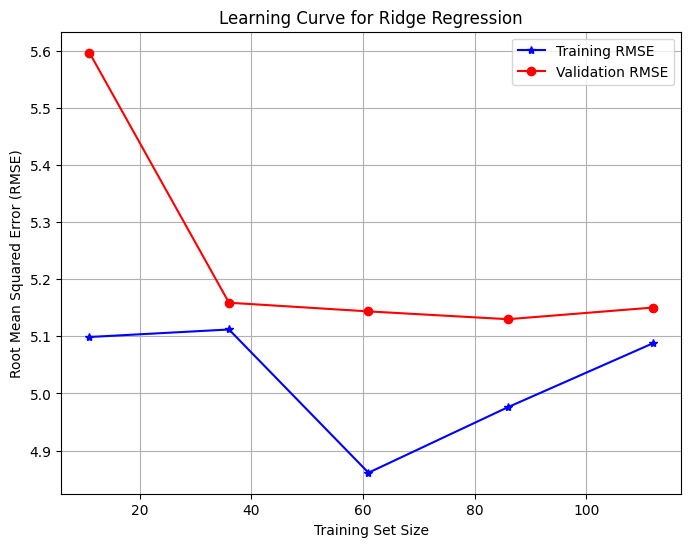

Running GridSearchCV for Lasso Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Lasso Regression - Best Parameters: {'lasso__alpha': 0.1}
Lasso Regression - Metrics: {'MSE': 34.09889838788989, 'RMSE': 5.839426203651339, 'RSE': 6.044380364191592, 'RSS': 2045.9339032733933, 'R²': -0.21888141871025169}



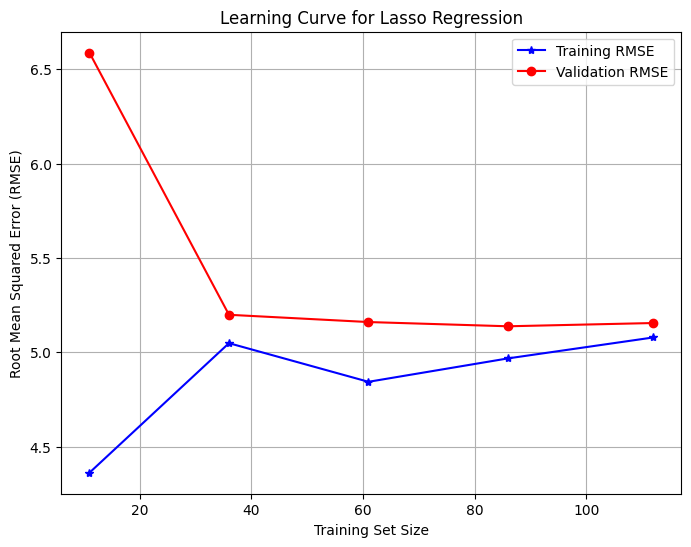

Running GridSearchCV for Principal Component Regression (PCR)...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Principal Component Regression (PCR) - Best Parameters: {'pca__n_components': 1}
Principal Component Regression (PCR) - Metrics: {'MSE': 33.73242148301734, 'RMSE': 5.8079619044047925, 'RSE': 6.011811720303267, 'RSS': 2023.9452889810402, 'R²': -0.20578152660657478}



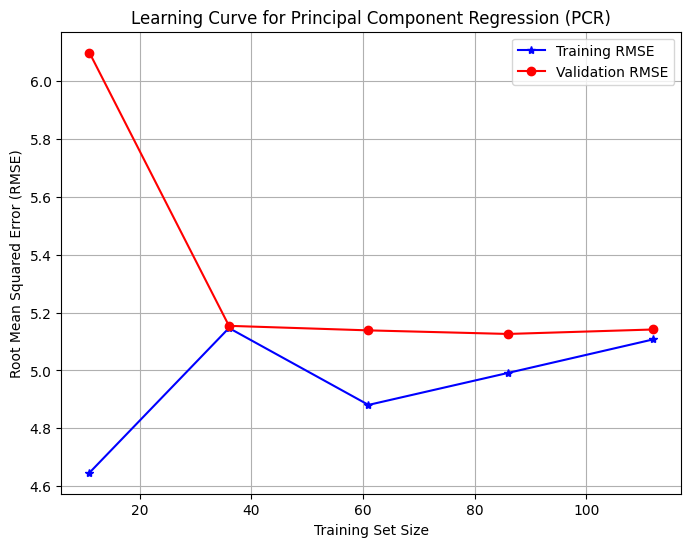

Running GridSearchCV for Regression Splines...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Regression Splines - Best Parameters: {'polynomialfeatures__degree': 2}
Regression Splines - Metrics: {'MSE': 37.24581587189562, 'RMSE': 6.102935021110386, 'RSE': 6.317137903458871, 'RSS': 2234.7489523137374, 'R²': -0.33136948808528}



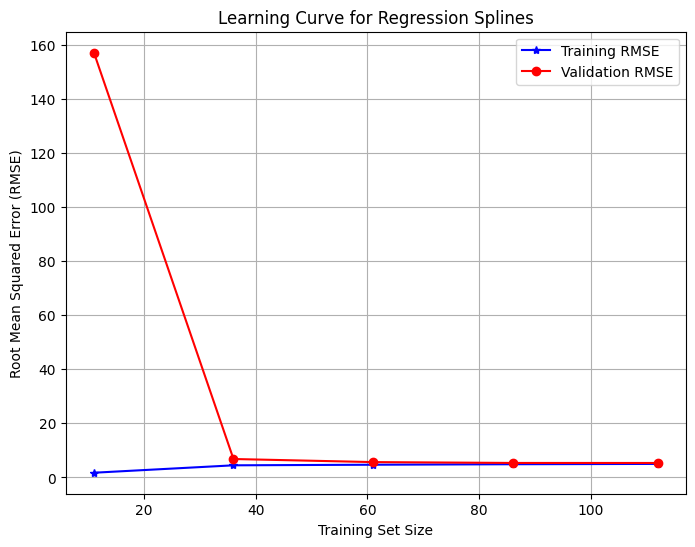

Running GridSearchCV for Regression Tree...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Regression Tree - Best Parameters: {'decisiontreeregressor__max_depth': 3, 'decisiontreeregressor__min_samples_leaf': 8, 'decisiontreeregressor__min_samples_split': 20}
Regression Tree - Metrics: {'MSE': 39.50710829615833, 'RMSE': 6.2854680252275825, 'RSE': 6.5060775128357315, 'RSS': 2370.4264977694997, 'R²': -0.41220046646031583}



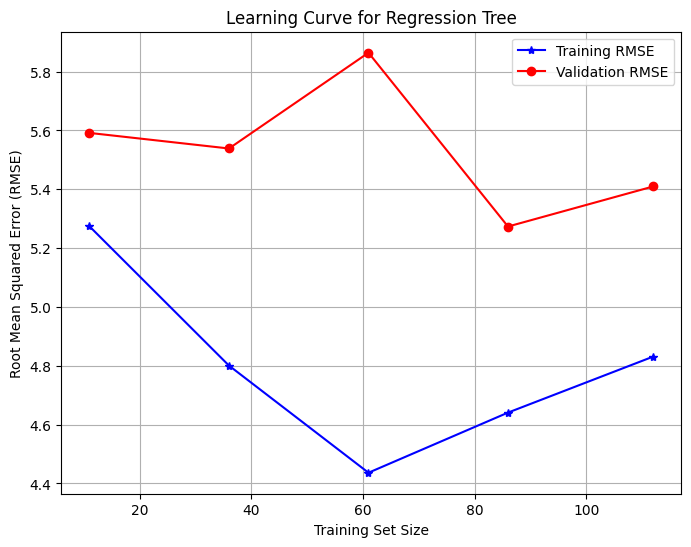

Running GridSearchCV for Support Vector Regression (SVR)...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Support Vector Regression (SVR) - Best Parameters: {'svr__C': 0.1, 'svr__epsilon': 1}
Support Vector Regression (SVR) - Metrics: {'MSE': 35.77269072186384, 'RMSE': 5.981027564044814, 'RSE': 6.190951697136935, 'RSS': 2146.3614433118305, 'R²': -0.2787119255921122}



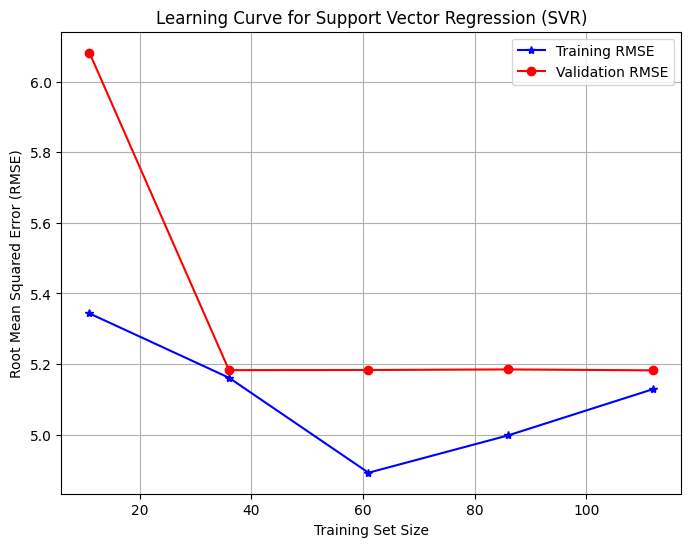


Model Performance Metrics:
                                            MSE      RMSE       RSE  \
Ridge Regression                      33.622286  5.798473  6.001989   
Lasso Regression                      34.098898  5.839426  6.044380   
Principal Component Regression (PCR)  33.732421  5.807962  6.011812   
Regression Splines                    37.245816  6.102935  6.317138   
Regression Tree                       39.507108  6.285468  6.506078   
Support Vector Regression (SVR)       35.772691  5.981028  6.190952   

                                              RSS        R²  
Ridge Regression                      2017.337140 -0.201845  
Lasso Regression                      2045.933903 -0.218881  
Principal Component Regression (PCR)  2023.945289 -0.205782  
Regression Splines                    2234.748952 -0.331369  
Regression Tree                       2370.426498 -0.412200  
Support Vector Regression (SVR)       2146.361443 -0.278712  

Best Parameters for Each Model:
Ridge R

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

X = data.drop(columns=['Sales'])
y = data['Sales']

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
pca_components = list(range(1, min(X_train_scaled.shape[0], X_train_scaled.shape[1]) + 1))

#parameter grids for hyperparameter tuning
param_grids = {
    'Ridge Regression': {'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
    'Lasso Regression': {'lasso__alpha': [0.01, 0.1, 1, 10, 100]},
    'Principal Component Regression (PCR)': {'pca__n_components': pca_components},
    'Regression Splines': {'polynomialfeatures__degree': [2, 3, 4]},
    'Regression Tree': {
        'decisiontreeregressor__max_depth': [3, 4, 5],
        'decisiontreeregressor__min_samples_split': [10, 15, 20],
        'decisiontreeregressor__min_samples_leaf': [4, 8, 10]
    },
    'Support Vector Regression (SVR)': {'svr__C': [0.1, 1, 10], 'svr__epsilon': [0.1, 0.5, 1]}
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#calculate metrics
def calculate_metrics(y_true, y_pred, n_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rss = np.sum((y_true - y_pred) ** 2)
    rse = np.sqrt(rss / (len(y_true) - n_features - 1))
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'RSE': rse, 'RSS': rss, 'R²': r2}

#plotting learning curves
def plot_learning_curve(model, X, y, model_name, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1
    )
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    test_rmse = np.sqrt(-test_scores.mean(axis=1))

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_rmse, label="Training RMSE", marker='*', color='blue')
    plt.plot(train_sizes, test_rmse, label="Validation RMSE", marker='o', color='red')
    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.legend()
    plt.grid()
    plt.show()

#results
results = {}
best_parameters = {}

#iterate and perform GridSearchCV
for model_name, grid_params in param_grids.items():
    print(f"Running GridSearchCV for {model_name}...")

    if model_name == 'Principal Component Regression (PCR)':
        model = make_pipeline(StandardScaler(), PCA(), LinearRegression())
    elif model_name == 'Regression Splines':
        model = make_pipeline(PolynomialFeatures(), LinearRegression())
    elif model_name == 'Ridge Regression':
        model = make_pipeline(StandardScaler(), Ridge(max_iter=5000))
    elif model_name == 'Lasso Regression':
        model = make_pipeline(StandardScaler(), Lasso(max_iter=5000))
    elif model_name == 'Regression Tree':
        model = make_pipeline(StandardScaler(), DecisionTreeRegressor())
    elif model_name == 'Support Vector Regression (SVR)':
        model = make_pipeline(StandardScaler(), SVR())

    #perform GridSearchCV
    grid_search = GridSearchCV(model, grid_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X_train_scaled, y_train)
    best_parameters[model_name] = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    #performance metrics
    metrics = calculate_metrics(y_test, y_pred, X_test_scaled.shape[1])
    results[model_name] = metrics

    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} - Metrics: {metrics}\n")

    #plot learning curve
    plot_learning_curve(best_model, X_train_scaled, y_train, model_name)

results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics:")
print(results_df)

#display best parameters
print("\nBest Parameters for Each Model:")
for model_name, params in best_parameters.items():
    print(f"{model_name}: {params}")
